In [2]:
Title
Introduction:
Preliminary exploratory data analysis:

Methods:

Expected outcomes and significance:


ERROR: Error in parse(text = x, srcfile = src): <text>:3:13: unexpected symbol
2: Introduction:
3: Preliminary exploratory
               ^


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
newyork_housing <- read_csv("data/NY-House-Dataset.csv")
head(newyork_housing)

Rows: 4801 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): BROKERTITLE, TYPE, ADDRESS, STATE, MAIN_ADDRESS, ADMINISTRATIVE_AR...
dbl  (6): PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,3.15e+05,2,2.000000,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, NY 10022, USA",40.76125,-73.97448
Brokered by Serhant,Condo for sale,1.95e+08,7,10.000000,17545,Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,"New York, NY 10019","Central Park Tower Penthouse-217 W 57th New York St Unit PenthouseNew York, NY 10019",United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.76639,-73.98099
Brokered by Sowae Corp,House for sale,2.60e+05,4,2.000000,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.54181,-74.19611
Brokered by COMPASS,Condo for sale,6.90e+04,3,1.000000,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.76140,-73.97461
Brokered by Sotheby's International Realty - East Side Manhattan Brokerage,Townhouse for sale,5.50e+07,7,2.373861,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.76722,-73.96986
Brokered by Sowae Corp,House for sale,6.90e+05,5,2.000000,4004,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.67436,-73.95872


In [4]:
newyork_filtered_data <- newyork_housing|>
        select(TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE) |>
        filter(PROPERTYSQFT < 20000, PRICE < 10000000)
    
head(newyork_filtered_data)

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Condo for sale,315000,2,2,1400.000,"New York, NY 10022"
House for sale,260000,4,2,2015.000,"Staten Island, NY 10312"
Condo for sale,69000,3,1,445.000,"Manhattan, NY 10022"
House for sale,690000,5,2,4004.000,"Brooklyn, NY 11238"
Condo for sale,899500,2,2,2184.208,"New York, NY 10027"
Co-op for sale,265000,1,1,750.000,"Bronx, NY 10473"


In [19]:
newyork_tidy <- newyork_filtered_data |>
                separate(STATE, c('CITY', 'NUMBER'), sep = ",") |>
                filter(TYPE != "Pending") |> 
                select(TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY) |> 
                mutate(BATH = as.integer(BATH))
head(newyork_tidy)

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY
<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Condo for sale,315000,2,2,1400.000,New York
House for sale,260000,4,2,2015.000,Staten Island
Condo for sale,69000,3,1,445.000,Manhattan
House for sale,690000,5,2,4004.000,Brooklyn
Condo for sale,899500,2,2,2184.208,New York
Co-op for sale,265000,1,1,750.000,Bronx


In [22]:
newyork_tidy_sample <- head(newyork_tidy, n = 50)
newyork_tidy_sample

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY
<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Condo for sale,315000,2,2,1400.000,New York
House for sale,260000,4,2,2015.000,Staten Island
Condo for sale,69000,3,1,445.000,Manhattan
House for sale,690000,5,2,4004.000,Brooklyn
Condo for sale,899500,2,2,2184.208,New York
Co-op for sale,265000,1,1,750.000,Bronx
Co-op for sale,440000,2,1,978.000,Brooklyn
Co-op for sale,375000,2,1,850.000,Bronx
Townhouse for sale,689000,3,2,1162.000,Staten Island


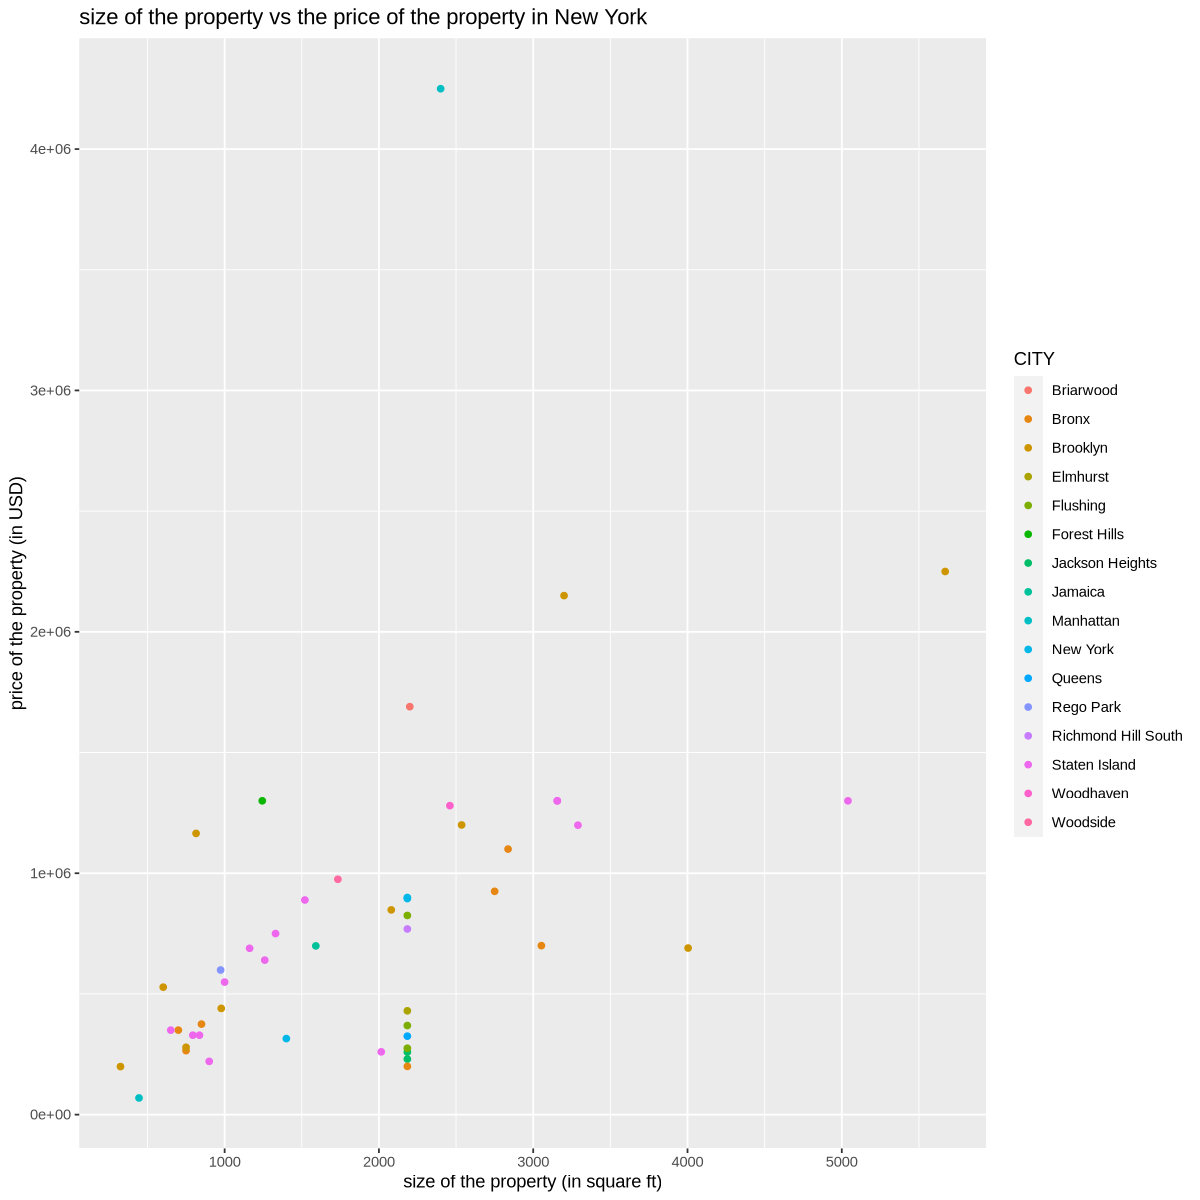

In [23]:
options(repr.plot.height = 10, repr.plot.width = 10)
price_sqft_plot <- newyork_tidy_sample |>
                ggplot(aes(x=PROPERTYSQFT, y=PRICE, color = CITY)) + #color later when figure out how to modify state
                geom_point() +
                labs(x="size of the property (in square ft)", y= "price of the property (in USD)") +
                ggtitle("size of the property vs the price of the property in New York")
price_sqft_plot